In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from gpt.template import basic_template
from pmd_beamphysics import single_particle
from gpt.lattice import Lattice
from gpt import GPT

In [3]:
pg1 = single_particle(pz=10_000)

In [4]:
lat = Lattice('drift')
lat.write_gpt_lines(output_file='gpt.temp.in')
G1 = GPT('gpt.temp.in', initial_particles=pg1)
G1.run()

In [5]:
pg2 = single_particle(z=G1.tout[-1]['mean_z'], pz=G1.tout[-1]['mean_pz'], t=G1.tout[-1]['mean_t'])
G2 = GPT('gpt.temp.in', initial_particles=pg2)
G2.set_variables({'time':G1.tout[-1]['mean_t'], 'tmax':2e-8})
G2.run()

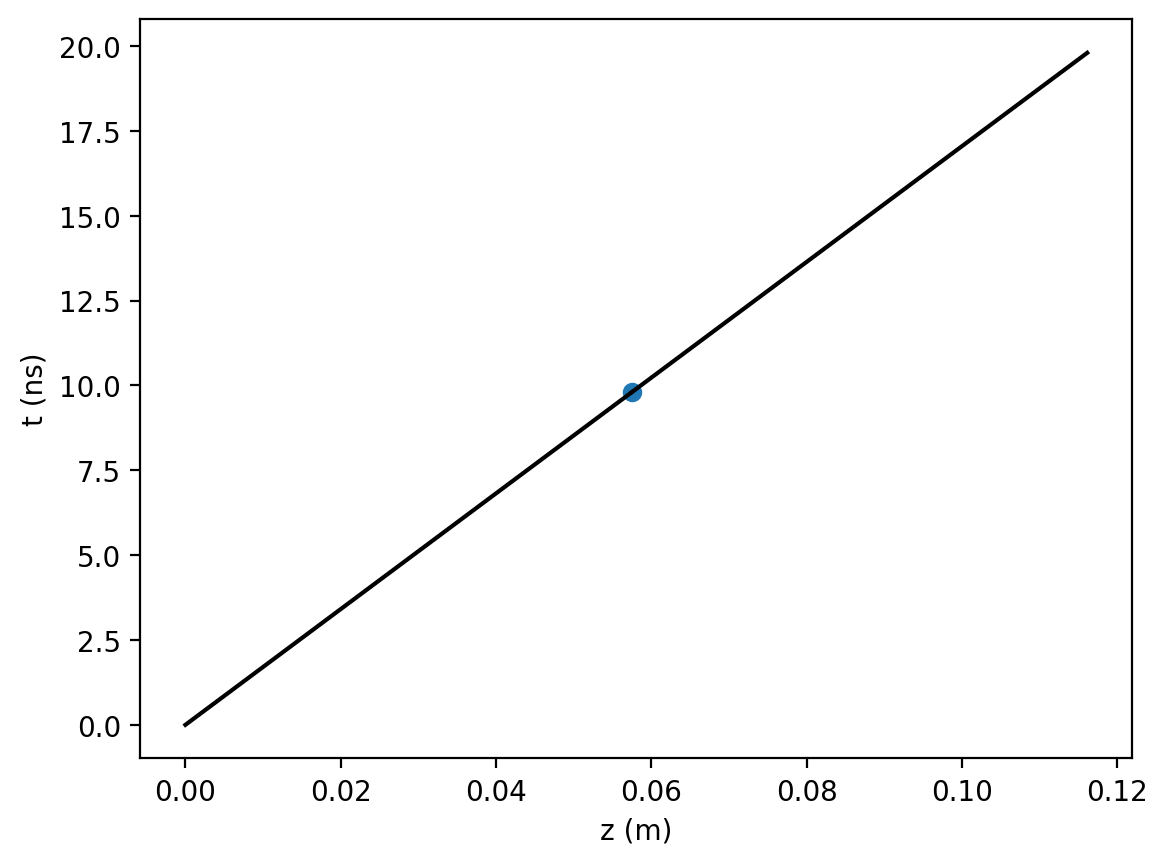

In [6]:
plt.plot(G1.stat('mean_z')[-1], G1.stat('mean_t')[-1]*1e9, 'o') 
plt.plot(G1.stat('mean_z'), G1.stat('mean_t')*1e9, 'k') 
plt.plot(G2.stat('mean_z'), G2.stat('mean_t')*1e9, 'k')

plt.xlabel('z (m)');
plt.ylabel('t (ns)');


In [7]:
import os

os.remove('gpt.temp.in')